In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from patsy import dmatrices

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Check for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Check how many are zeros
column_names = df.columns
for name in column_names:
    print("Number of zeros in " + name + " = " +  str(len(df[df[name] == 0])))

#Zeros in pregnancies, age, diabetes pedigree function, and outcome should be fine

Number of zeros in Pregnancies = 111
Number of zeros in Glucose = 5
Number of zeros in BloodPressure = 35
Number of zeros in SkinThickness = 227
Number of zeros in Insulin = 374
Number of zeros in BMI = 11
Number of zeros in DiabetesPedigreeFunction = 0
Number of zeros in Age = 0
Number of zeros in Outcome = 500


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
#after dropping skin thick = 0 and before substituting
temp = df[df['SkinThickness'] != 0]


In [8]:
temp = df[df['Insulin'] == 0]
temp[temp['Outcome'] == 1].shape

(138, 9)

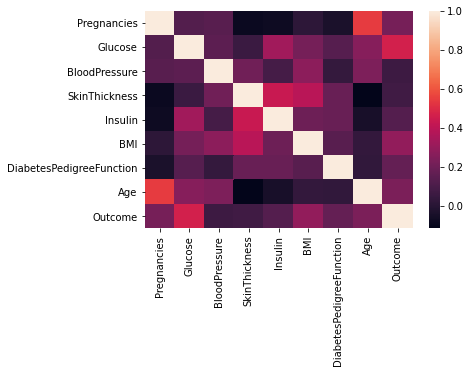

In [9]:
sns.heatmap(df.corr())
sns.set(rc={'figure.figsize':(12,12)})

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

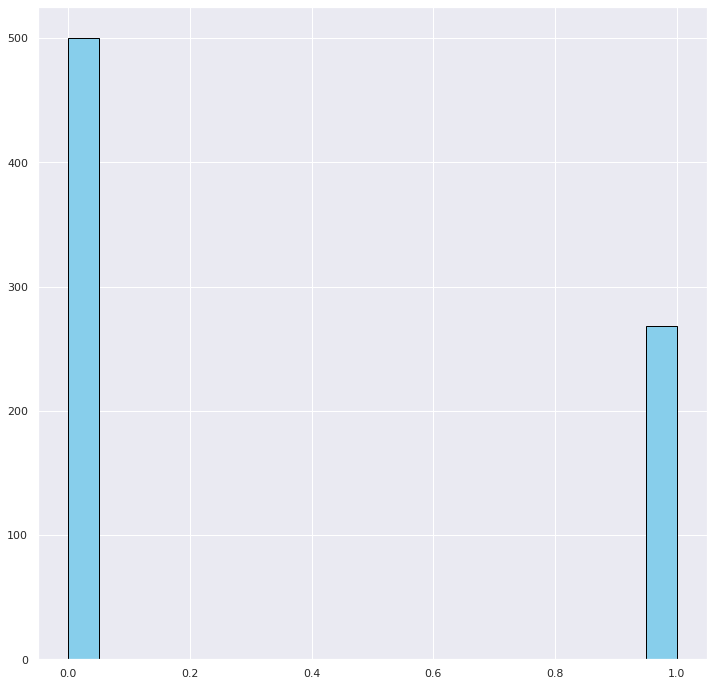

In [73]:
plt.hist(df['Outcome'], bins = 20, ec="black", color = "skyblue")

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1


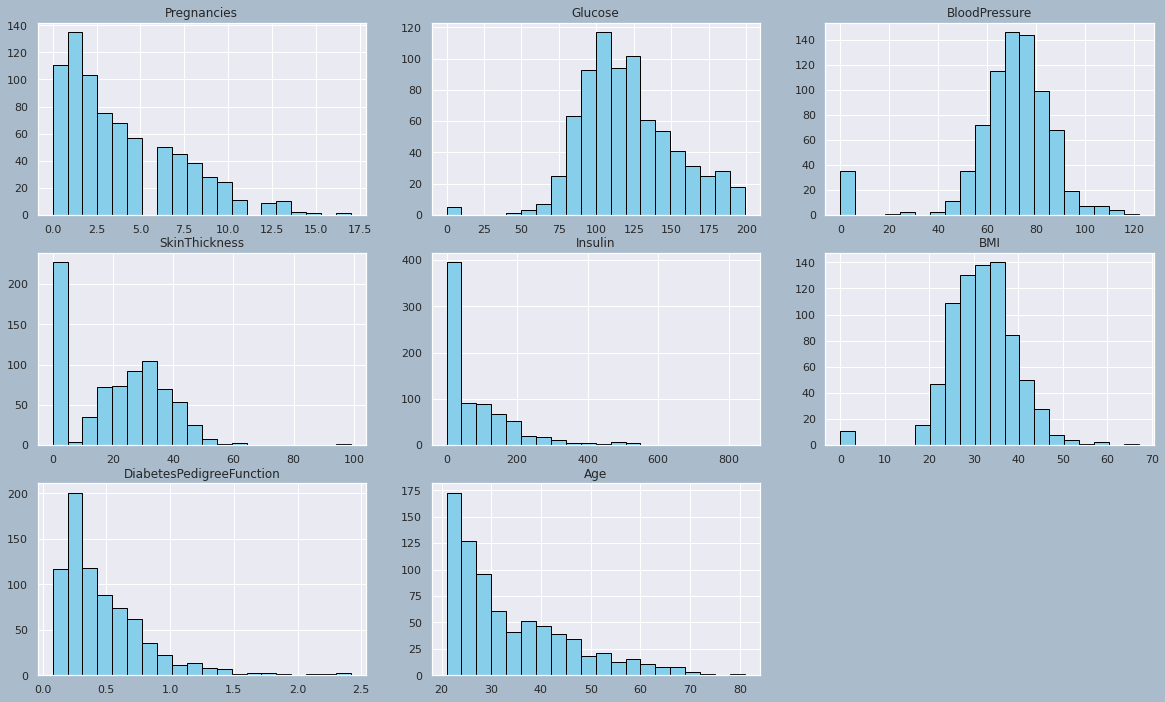

In [11]:
fig = plt.figure(figsize=(20,12))
grid = fig.add_gridspec(3,3)

subplot_list = []
for x in range(0,3):
    for y in range(0,3):
        if x != 2 or y != 2:
            subplot_list.append(fig.add_subplot(grid[x,y]))


fig.patch.set_facecolor("#aabbcc")
cols = df.columns
for col, subplot in zip(cols, subplot_list):
    subplot.hist(df[col], bins = 20, ec="black", color = "skyblue")
    subplot.set_title(col)

plt.show()

### Skin Thickness - based on outcome 0 and 1

In [12]:
skinThick_without_zeros = df[df['SkinThickness'] != 0]

In [13]:
skinThick_without_zeros

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [14]:
#We used mean because we saw that the distribution plot os skin thickness was NOT skewed

skin_outcome_0 = skinThick_without_zeros[skinThick_without_zeros['Outcome'] == 0]['SkinThickness'].mean()

In [15]:
skin_outcome_1 = skinThick_without_zeros[skinThick_without_zeros['Outcome'] == 1]['SkinThickness'].mean()

In [16]:
skin_outcome_1

33.0

In [17]:
skin_outcome_0

27.235457063711912

In [18]:
df.shape

(768, 9)

In [19]:
for i in range(0, 768):
    if df['SkinThickness'].iloc[i] == 0 and df['Outcome'].iloc[i] ==0:
        df['SkinThickness'].iloc[i] = skin_outcome_0
    if df['SkinThickness'].iloc[i] == 0 and df['Outcome'].iloc[i] ==1:
        df['SkinThickness'].iloc[i] = skin_outcome_1

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [20]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,33.0,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
4,0,137,40,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180,32.9,0.171,63,0
764,2,122,70,27.0,0,36.8,0.340,27,0
765,5,121,72,23.0,112,26.2,0.245,30,0
766,1,126,60,33.0,0,30.1,0.349,47,1


In [21]:
#We did include rows where BMI and Glucose were 0 because there are not enough number of these rows that can skew the 
#entire distribution 


df_imputer = df.copy(deep =True)


In [22]:
df_imputer.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,33.0,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
4,0,137,40,35.0,168,43.1,2.288,33,1


In [23]:
df_imputer['SkinThickness'] = df_imputer['SkinThickness'].replace(0,np.nan)
df_imputer['Insulin'] = df_imputer['Insulin'].replace(0,np.nan)
df_imputer['Glucose'] = df_imputer['Glucose'].replace(0,np.nan)
df_imputer['BloodPressure'] = df_imputer['BloodPressure'].replace(0,np.nan)
df_imputer['BMI'] = df_imputer['BMI'].replace(0,np.nan)

In [24]:
count_null_values = df_imputer.isnull().sum()

In [25]:
sum(count_null_values)

425

In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(random_state=0, max_iter = 652, sample_posterior = True)
temp = imp.fit_transform(df_imputer)
df_imputer = pd.DataFrame(temp)

In [27]:
df_imputer.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,132.472560,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,104.266133,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,33.0,154.838639,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1.0


In [28]:
df_imputer.columns = df.columns

In [29]:
df_imputer.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126524,0.219148,0.094172,0.097760,0.022302,-0.033523,0.544341,0.221898
Glucose,0.126524,1.000000,0.220900,0.233401,0.532930,0.226372,0.136063,0.264607,0.492384
BloodPressure,0.219148,0.220900,1.000000,0.197877,0.117191,0.306370,0.003727,0.325714,0.173410
SkinThickness,0.094172,0.233401,0.197877,1.000000,0.187687,0.560800,0.102426,0.135916,0.308094
Insulin,0.097760,0.532930,0.117191,0.187687,1.000000,0.229322,0.104978,0.188090,0.312270
BMI,0.022302,0.226372,0.306370,0.560800,0.229322,1.000000,0.149747,0.020331,0.309486
DiabetesPedigreeFunction,-0.033523,0.136063,0.003727,0.102426,0.104978,0.149747,1.000000,0.033561,0.173844
Age,0.544341,0.264607,0.325714,0.135916,0.188090,0.020331,0.033561,1.000000,0.238356
Outcome,0.221898,0.492384,0.173410,0.308094,0.312270,0.309486,0.173844,0.238356,1.000000


Text(0.5, 1.0, 'Age')

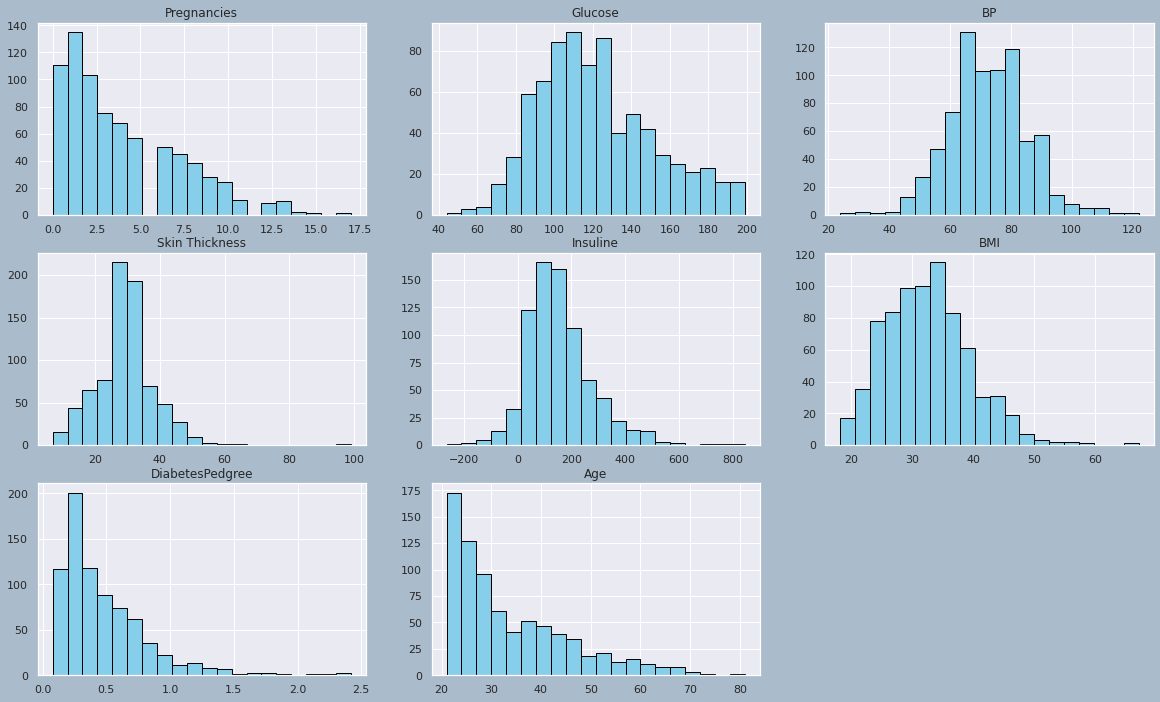

In [30]:
fig = plt.figure(figsize=(20,12))
grid = fig.add_gridspec(3,3)

subplot_list = []
for x in range(0,3):
    for y in range(0,3):
        if x != 2 or y != 2:
            subplot_list.append(fig.add_subplot(grid[x,y]))


fig.patch.set_facecolor("#aabbcc")
cols = df.columns
for col, subplot in zip(cols, subplot_list):
    subplot.hist(df[col], bins = 20, ec="black", color = "skyblue")
    subplot.set_title(col)

plt.show()


In [32]:
column_names = df_imputer.columns
for name in column_names:
    print("Number of zeros in " + name + " = " +  str(len(df_imputer[df_imputer[name] == 0])))

Number of zeros in Pregnancies = 111
Number of zeros in Glucose = 0
Number of zeros in BloodPressure = 0
Number of zeros in SkinThickness = 0
Number of zeros in Insulin = 0
Number of zeros in BMI = 0
Number of zeros in DiabetesPedigreeFunction = 0
Number of zeros in Age = 0
Number of zeros in Outcome = 500


<AxesSubplot:>

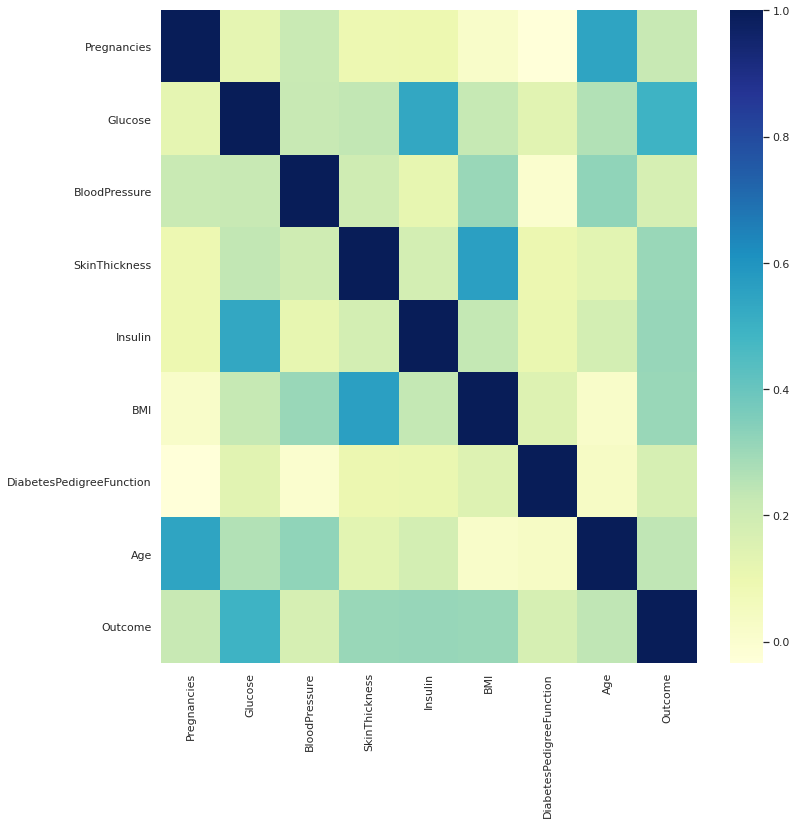

In [33]:

sns.heatmap(df_imputer.corr(), cmap="YlGnBu")

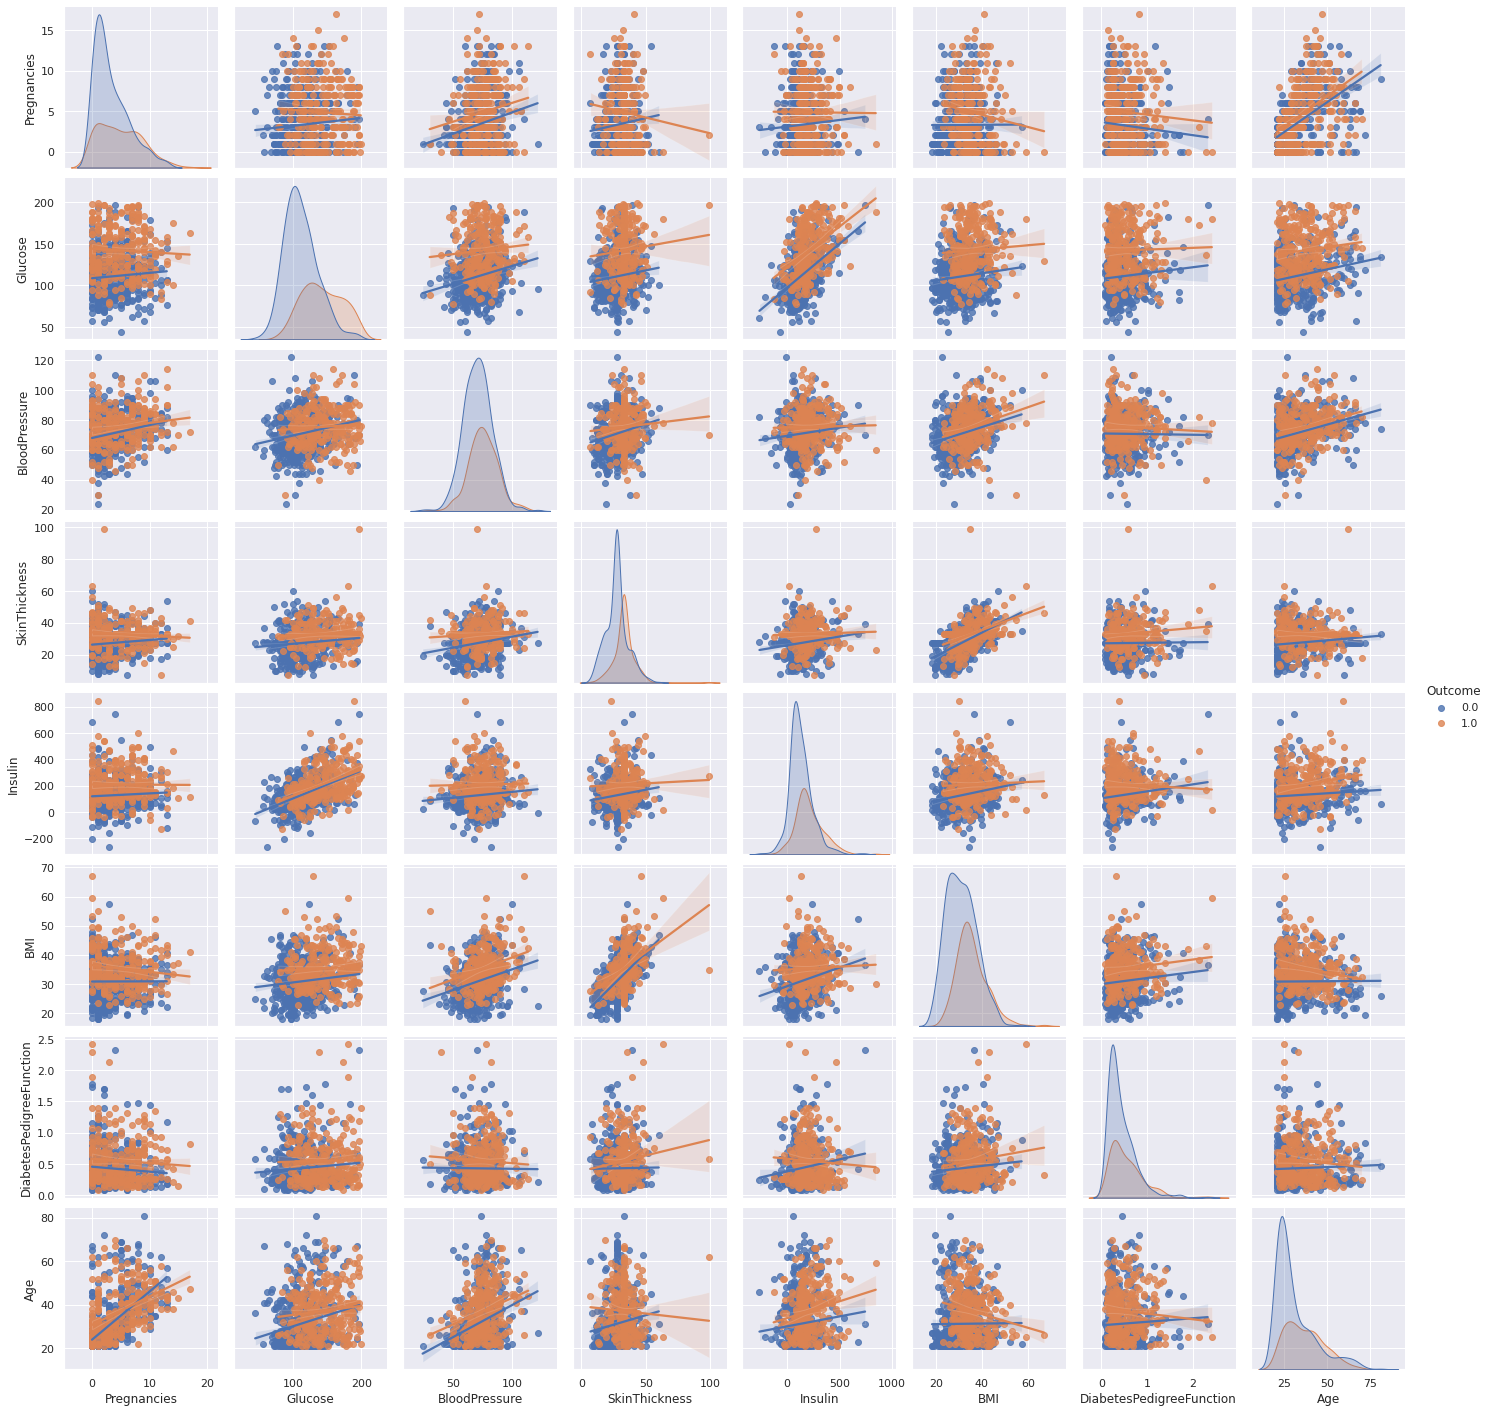

In [39]:
sns.pairplot(df_imputer, kind="reg", hue="Outcome")

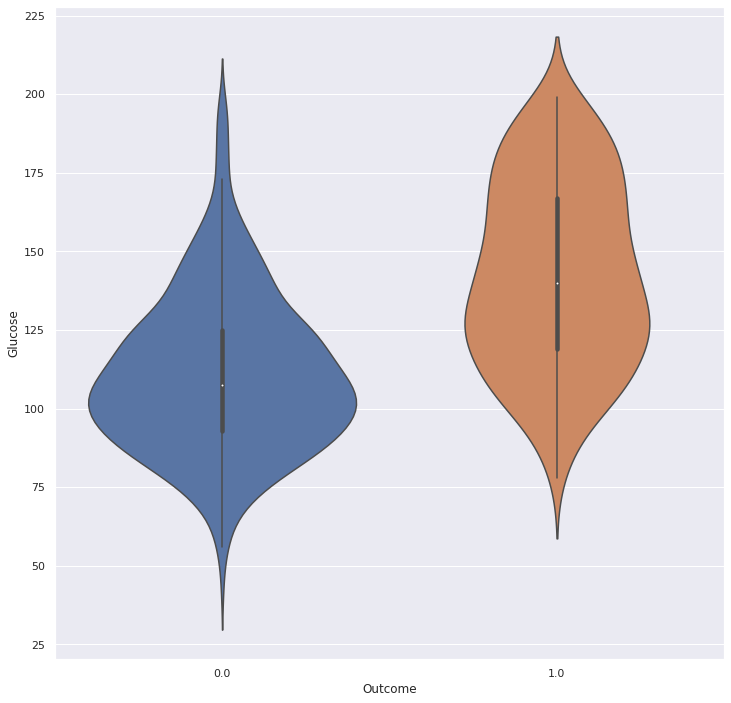

In [34]:
sns.violinplot(data=df_imputer, x = 'Outcome', y = 'Glucose')
sns.set(rc={'figure.figsize':(12,12)})

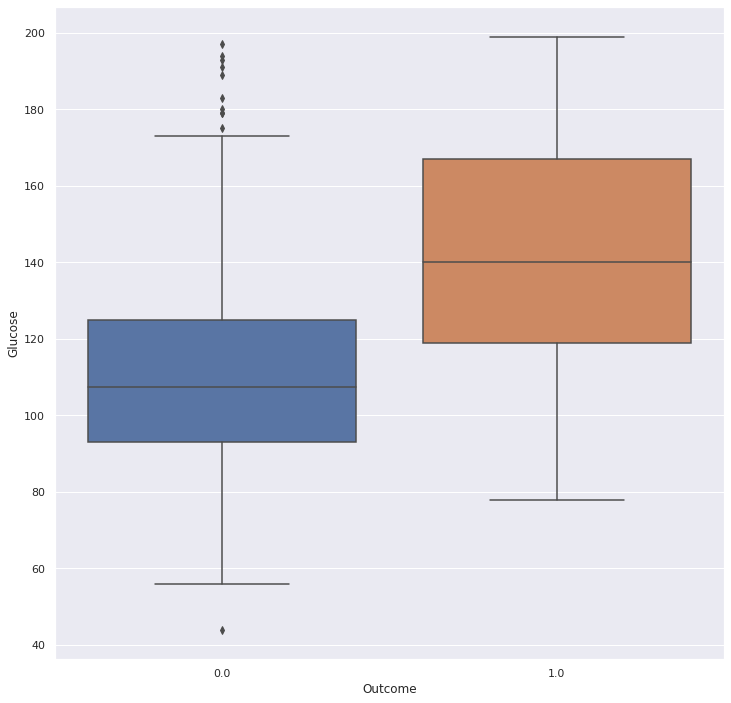

In [35]:
sns.boxplot(data=df_imputer, x = 'Outcome', y = 'Glucose')
sns.set(rc={'figure.figsize':(12,12)})

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

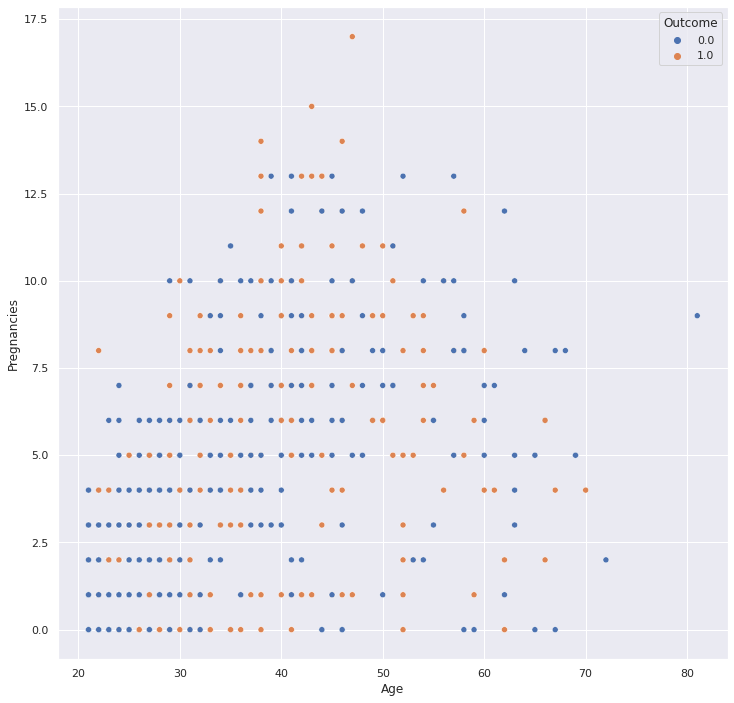

In [36]:
sns.scatterplot(data=df_imputer, x = 'Age', y = 'Pregnancies', hue = 'Outcome')

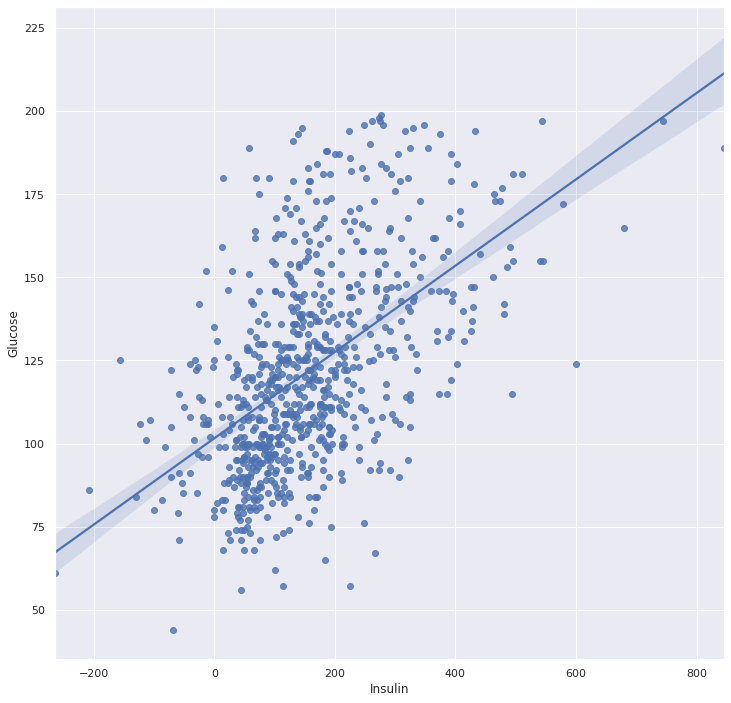

In [37]:
sns.regplot(data=df_imputer, x = 'Insulin', y = 'Glucose')
sns.set(rc={'figure.figsize':(12,12)})

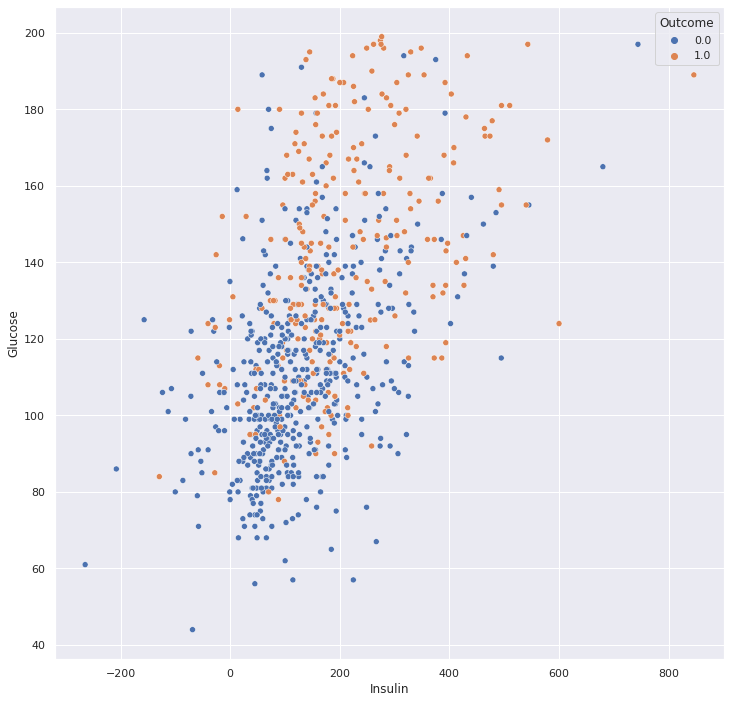

In [38]:
sns.scatterplot(data=df_imputer, x = 'Insulin', y = 'Glucose', hue = 'Outcome')
sns.set(rc={'figure.figsize':(12,12)})

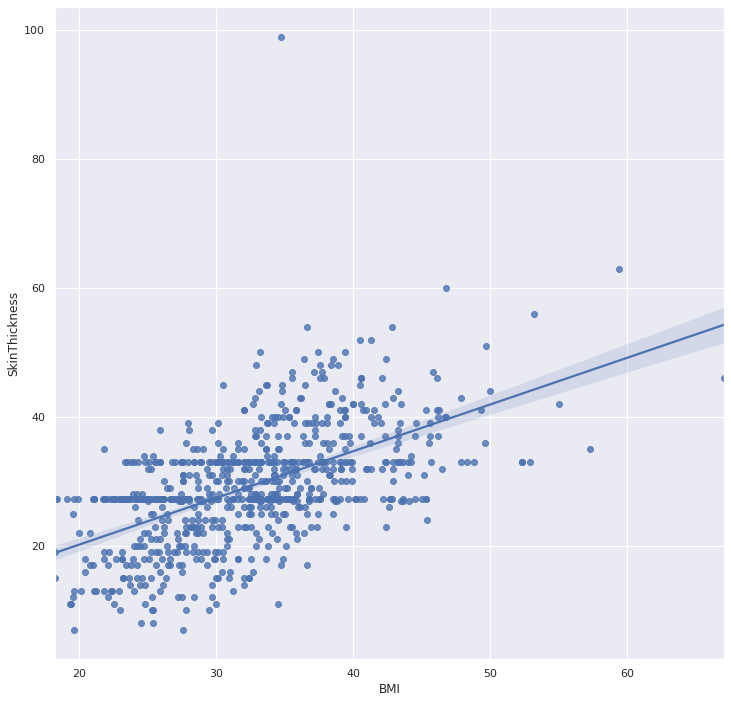

In [40]:
sns.regplot(data=df_imputer, x = 'BMI', y = 'SkinThickness')
sns.set(rc={'figure.figsize':(12,12)})

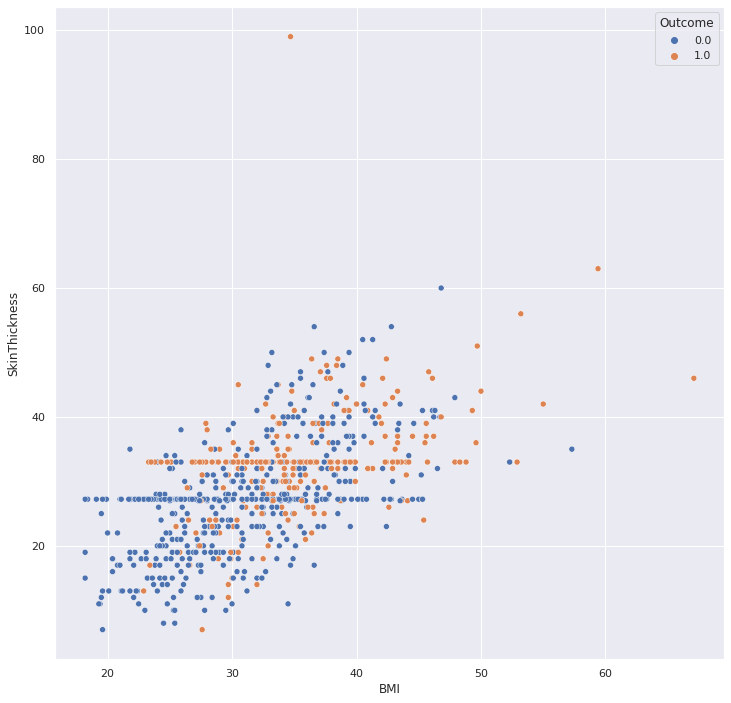

In [74]:
sns.scatterplot(data=df_imputer, x = 'BMI', y = 'SkinThickness', hue = 'Outcome')
sns.set(rc={'figure.figsize':(12,12)})

In [86]:
df_imputer.corr('spearman')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insulin*glucose
Pregnancies,1.000000,0.127717,0.191440,0.107211,0.130608,0.002121,-0.043242,0.607216,0.198689,-0.058139
Glucose,0.127717,1.000000,0.251615,0.258515,0.543838,0.220766,0.090491,0.278862,0.481395,0.573728
BloodPressure,0.191440,0.251615,1.000000,0.219501,0.153236,0.318020,0.016433,0.364868,0.179686,0.036673
SkinThickness,0.107211,0.258515,0.219501,1.000000,0.229239,0.571028,0.063148,0.203268,0.367195,0.153236
Insulin,0.130608,0.543838,0.153236,0.229239,1.000000,0.263709,0.082235,0.224676,0.334117,0.398096
BMI,0.002121,0.220766,0.318020,0.571028,0.263709,1.000000,0.130770,0.113310,0.305184,0.237074
DiabetesPedigreeFunction,-0.043242,0.090491,0.016433,0.063148,0.082235,0.130770,1.000000,0.042909,0.175353,0.225077
Age,0.607216,0.278862,0.364868,0.203268,0.224676,0.113310,0.042909,1.000000,0.309040,0.025037
Outcome,0.198689,0.481395,0.179686,0.367195,0.334117,0.305184,0.175353,0.309040,1.000000,0.253786
insulin*glucose,-0.058139,0.573728,0.036673,0.153236,0.398096,0.237074,0.225077,0.025037,0.253786,1.000000


## Hypothesis: Insulin, BMI, Glucose are correlated to outcome because the corr values are above 0.3

In [42]:
Y, X = dmatrices('Outcome ~ Insulin+BMI+Glucose', data=df_imputer, return_type='dataframe')
linearModel = sm.OLS(Y, X)
fittedModel = linearModel.fit()
fittedModel.summary()

In [61]:
import scipy.stats as st
#l = pd.DataFrame(np.random.rand(768,1))
#df_imputer['Random'] = l
d1 = df_imputer.drop('Outcome', axis = 1)

d2 = np.array(df_imputer['Outcome'])

for value in d1.columns:
    temp = np.array(df_imputer[value])
    stat, p = st.shapiro(temp)
    print(value)
    print('stat=%.3f, p=%.75f' % (stat, p))
    
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

Pregnancies
stat=0.904, p=0.000000000000000000001608088588159061261810453920999622323684263847098918632
Probably not Gaussian
Glucose
stat=0.970, p=0.000000000024578681104281407954204041743651032447814941406250000000000000000
Probably not Gaussian
BloodPressure
stat=0.992, p=0.000502025068271905183792114257812500000000000000000000000000000000000000000
Probably not Gaussian
SkinThickness
stat=0.953, p=0.000000000000005367789241252692716832584096664504613727331161499023437500000
Probably not Gaussian
Insulin
stat=0.947, p=0.000000000000000504725175110004977210853560620762436883524060249328613281250
Probably not Gaussian
BMI
stat=0.980, p=0.000000009886427676519815577194094657897949218750000000000000000000000000000
Probably not Gaussian
DiabetesPedigreeFunction
stat=0.837, p=0.000000000000000000000000002477696547502534846647056064876676451764429126579
Probably not Gaussian
Age
stat=0.875, p=0.000000000000000000000002401946561183188154459988075701420712909639476606571
Probably not Gaussian

In [65]:
import scipy.stats as st

d1 = df_imputer.drop(['Outcome'], axis = 1)

d2 = np.array(df_imputer['Outcome'])

for value in d1.columns:
    temp = np.array(df_imputer[value])
    stat, p = st.spearmanr(temp, d2)
    print(value)
    print('stat=%.3f, p=%.75f' % (stat, p))
    
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably not independent')

Pregnancies
stat=0.199, p=0.000000028127844791298707443405726562161983661525255229207687079906463623047
Probably not independent
Glucose
stat=0.481, p=0.000000000000000000000000000000000000000000000840694834901694855300908987451
Probably not independent
BloodPressure
stat=0.180, p=0.000000537687103752807803313412161883011464169612736441195011138916015625000
Probably not independent
SkinThickness
stat=0.367, p=0.000000000000000000000000063182894294573203173822225592385449118826435960482
Probably not independent
Insulin
stat=0.334, p=0.000000000000000000001746203137024068576313265960448895869238276488321163586
Probably not independent
BMI
stat=0.305, p=0.000000000000000005107280710967877632298793104224766017911644612578721258433
Probably not independent
DiabetesPedigreeFunction
stat=0.175, p=0.000001010634109565343320132979956782470765119796851649880409240722656250000
Probably not independent
Age
stat=0.309, p=0.000000000000000001852974424537641118592004870587511570322408042908453144892


[array([ 6.,  1.,  8.,  1.,  0.,  5.,  3., 10.,  2.,  8.,  4., 10., 10.,
        1.,  5.,  7.,  0.,  7.,  1.,  1.,  3.,  8.,  7.,  9., 11., 10.,
        7.,  1., 13.,  5.,  5.,  3.,  3.,  6., 10.,  4., 11.,  9.,  2.,
        4.,  3.,  7.,  7.,  9.,  7.,  0.,  1.,  2.,  7.,  7.,  1.,  1.,
        5.,  8.,  7.,  1.,  7.,  0.,  0.,  0.,  2.,  8.,  5.,  2.,  7.,
        5.,  0.,  2.,  1.,  4.,  2.,  5., 13.,  4.,  1.,  1.,  7.,  5.,
        0.,  2.,  3.,  2.,  7.,  0.,  5.,  2., 13.,  2., 15.,  1.,  1.,
        4.,  7.,  4.,  2.,  6.,  2.,  1.,  6.,  1.,  1.,  1.,  0.,  1.,
        2.,  1.,  1.,  4.,  3.,  0.,  3.,  8.,  1.,  4.,  7.,  4.,  5.,
        5.,  4.,  4.,  0.,  6.,  2.,  5.,  0.,  1.,  3.,  1.,  1.,  0.,
        4.,  9.,  3.,  8.,  2.,  2.,  0.,  0.,  0.,  5.,  3.,  5.,  2.,
       10.,  4.,  0.,  9.,  2.,  5.,  2.,  1.,  4.,  9.,  1.,  8.,  7.,
        2.,  1.,  2., 17.,  4.,  7.,  0.,  2.,  0.,  6.,  3.,  4.,  4.,
        3.,  6.,  6.,  2.,  1.,  2.,  8.,  6.,  0.,  5.,  5.,  

ValueError: The internally computed table of expected frequencies has a zero element at (0, 57).

In [75]:
Y, X = dmatrices('Outcome ~ Insulin+BMI+Glucose', data=df_imputer, return_type='dataframe')
model = sm.glsar(Y, X)
fittedModel = model.fit()
fittedModel.summary()

AttributeError: module 'statsmodels.api' has no attribute 'glsar'